In [1]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
from ipywidgets import interact, FloatSlider, RadioButtons,Dropdown,SelectMultiple,FloatRangeSlider
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import h5py
import os
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text

Populating the interactive namespace from numpy and matplotlib


/Users/james/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy

/Users/james/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



## 3D

In [2]:
pd.read_table('hcc_lulab.lengthN.stat.tsv.tmp.re.per').head()

,miRNA,piRNA,Y_RNA,srpRNA,snRNA,snoRNA,tRNA,lncRNA,vaultRNA,tucpRNA,mRNA
16,0.141872,0.466207,0.028963,4.627531,1.147089,1.630077,5.771060,2.806647,0.549985,2.016418,6.232335
17,0.212468,0.451972,0.069008,3.703953,1.659296,2.974727,2.349156,1.719334,0.521805,1.228207,4.262490
18,1.794238,0.487786,0.288242,3.892249,1.965033,1.386472,3.415628,4.776135,0.578165,3.929185,15.276062
19,1.293543,0.636484,0.075645,3.511703,5.053447,0.874827,3.524774,3.240123,0.101057,1.694700,6.687944
20,6.172386,0.476342,0.028771,4.516296,11.486705,1.053891,5.590829,5.991489,0.332323,1.675739,8.426085


In [ ]:
miRNA, piRNA, Y_RNA,srpRNA,tRNA,snoRNA,snRNA,vaultRNA, lncRNA,mRNA,tucpRNA

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def plot_3d(rnaname,count_,num,dataname,width,height,azim,elev,contextind,styind):
    '''
    count_ 长度种类  num rna数量
    '''
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    if dataname =='4_len':
        lengthdat = np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:]).T
    elif dataname =='final':
        lengthdat = np.array(pd.read_table('hcc_lulab.lengthN.stat.tsv.tmp.re.per').iloc[:,np.array([0,1,2,3,6,5,4,8,7,10,9])]).T
    fig = plt.figure(figsize=(width,height))
    ax1 = fig.gca(projection="3d")

    xpos = np.repeat(np.arange(1,count_+1),num).reshape(count_,-1).T.ravel()
    ypos = np.repeat(range(num),count_).ravel()
    num_elements = len(xpos)
    zpos = np.zeros(count_*num)
    dx = np.ones(count_*num)/5
    dy = np.ones(count_*num)/5
    dz = lengthdat.ravel()

    for i in range(num):
        ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
                  dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=(np.array(tableau20)/float(256))[:num][i],alpha=0.9)
    plt.xticks(range(count_), [str(i+16) for i in range(count_)], color='red')
    #for i in range(9):
    ax1.set_yticks(range(num))
    if rnaname=='9kind':
        rnanames = ['miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'snoRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA']
    if rnaname=='11kind':
        rnanames =  [u'miRNA', u'piRNA', u'Y_RNA', u'srpRNA', u'snRNA', u'snoRNA', u'tRNA',
       u'lncRNA', u'vaultRNA', u'tucpRNA', u'mRNA']
    ax1.set_yticklabels(rnanames, color='blue')
    for color,tick in zip((np.array(tableau20)/float(256))[:num],ax1.yaxis.get_major_ticks()):
        tick.label1.set_color(color)
    ax1.view_init(azim=azim,elev=elev)  # 50 20
    ax1.set_title('width,height,azim,elev: ' + str(width)+"   "+str(height)+"   "+str(azim)+"   "+str(elev),fontsize=30)
    #ax1.bar3d(xpos[3:], ypos[3:], zpos[3:], dx[3:], dy[3:], dz[3:], color='b')
    #print ('azim: '+str(azim))
    fig.tight_layout()
    plt.show()
    #fig.savefig('images/length/lengthdistribution_'+str(t))

In [41]:
interact(plot_3d,
         rnaname =Dropdown(options=['11kind']),
         dataname = Dropdown(options=['final']),
    styind=FloatSlider(min=0,max=2,step=1),
         count_=IntSlider(min=30,max=40,step=1,value=34),
    num=IntSlider(min=7,max=15,step=1,value=11),
    contextind=FloatSlider(min=0,max=3,step=1,value=2),
    width =FloatSlider(min=4,max=40,step=1,value=25),
    height= FloatSlider(min=4,max=30,step=1,value=16),
    azim= FloatSlider(min=0,max=180,step=2,value=45),
    elev= FloatSlider(min=0,max=180,step=1,value=32))

interactive(children=(Dropdown(description=u'rnaname', options=('11kind',), value='11kind'), IntSlider(value=34, description=u'count_', max=40, min=30), IntSlider(value=11, description=u'num', max=15, min=7), Dropdown(description=u'dataname', options=('final',), value='final'), FloatSlider(value=25.0, description=u'width', max=40.0, min=4.0, step=1.0), FloatSlider(value=16.0, description=u'height', max=30.0, min=4.0, step=1.0), FloatSlider(value=45.0, description=u'azim', max=180.0, step=2.0), FloatSlider(value=32.0, description=u'elev', max=180.0, step=1.0), FloatSlider(value=2.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=0.0, description=u'styind', max=2.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3d>

In [7]:
nameforlength = ['miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'snoRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA']

In [8]:
pd.read_table('table/per/4_len_summary.per').head()

,len,miRNA,piRNA,Y_RNA,snRNA,snoRNA,srpRNA,tRNA,lncRNA,mRNA
0,16,0.070658,1.540888,0.063933,1.365320,2.971636,4.478647,5.571676,3.695235,8.107609
1,17,0.100019,1.927832,0.080970,1.552815,6.777645,2.897948,3.744005,2.534494,6.565061
2,18,0.628072,2.281596,0.271323,2.473570,2.467265,3.771492,5.448757,4.352928,10.320454
3,19,0.782788,1.590149,0.172363,5.158128,1.964523,5.990017,5.249264,3.636867,7.756351
4,20,4.127704,1.983730,0.036394,13.573236,1.744522,6.738769,7.312699,9.331055,7.237323


np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:])

In [9]:
plot_3d(nameforlength,35,9,np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:]).T,azim=50,elev=20)

TypeError: plot_3d() takes exactly 8 arguments (6 given)

In [10]:
plot_3d(nameforlength,35,9,np.array(pd.read_table('table/per/64_len_summary.per').iloc[:,1:]).T,azim=50,elev=20)

TypeError: plot_3d() takes exactly 8 arguments (6 given)

In [428]:
np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:]).shape

(35, 9)

In [426]:
def line_plot(styind,contextind,width,height,linewid):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])

    fig, ax = plt.subplots(figsize=(width,height))
    for i in range(len(nameforlength)):
        ax.plot(np.arange(16,51),np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:])[:,i],
            linewidth=linewid,label = nameforlength[i])
    ax.legend()
interact(line_plot,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
        linewid= FloatSlider(min=1,max=3,step=0.2,value=1.5))

interactive(children=(FloatSlider(value=1.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), FloatSlider(value=1.5, description=u'linewid', max=3.0, min=1.0, step=0.2), Output()), _dom_classes=('widget-interact',))

<function __main__.line_plot>

In [427]:
def line_plot(styind,contextind,width,height,linewid,fontsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])

    fig, ax = plt.subplots(len(nameforlength),figsize=(width,height))
    for i in range(len(nameforlength)):
        ax[i].plot(np.arange(16,51),np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:])[:,i],
            linewidth=linewid,label = nameforlength[i],color=['b', 'g', 'r', 'c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y'][i])
        ax[i].legend(prop={'size': fontsize})
interact(line_plot,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=8,max=20,step=1,value=12),
         fontsize= FloatSlider(min=5,max=10,step=0.4,value=8),
        linewid= FloatSlider(min=1,max=3,step=0.2,value=1.5))

interactive(children=(FloatSlider(value=1.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=12.0, description=u'height', max=20.0, min=8.0, step=1.0), FloatSlider(value=1.5, description=u'linewid', max=3.0, min=1.0, step=0.2), FloatSlider(value=8.0, description=u'fontsize', max=10.0, min=5.0, step=0.4), Output()), _dom_classes=('widget-interact',))

<function __main__.line_plot>

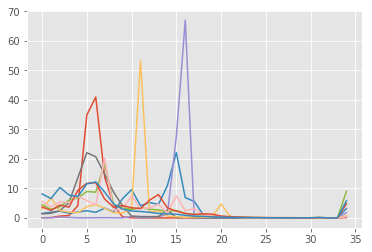

In [14]:
plt.plot(np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:]))

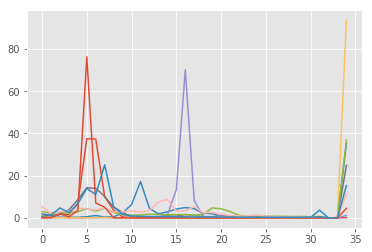

In [16]:
plt.plot(np.array(pd.read_table('table/per/64_len_summary.per').iloc[:,1:]))

## pie

In [3]:
np.average(np.array(pd.read_table('table/per/4_order_summary.per').iloc[:,2:]),axis=0)/100.

array([1.04276420e-03, 4.66056489e-01, 8.71460616e-03, 3.78655373e-01,
       4.77542138e-03, 2.21349038e-03, 1.49202312e-04, 1.05579849e-03,
       3.38186611e-03, 5.16146276e-03, 5.21873242e-02, 7.66062017e-02])

In [4]:
pd.read_table('table/per/4_order_summary.per').columns

Index([u'sample', u'cleanN', u'rRNA_N', u'miRNA', u'piRNA', u'Y_RNA', u'snRNA',
       u'snoRNA', u'srpRNA', u'tRNA', u'lncRNA', u'mRNA', u'hg38other',
       u'nonHuman_N'],
      dtype='object')

In [11]:
ratiornanames = ['rRNA_N', u'miRNA', u'piRNA', u'Y_RNA', u'snRNA',
       u'snoRNA', u'srpRNA', u'tRNA', u'lncRNA', u'mRNA', u'hg38other',
       u'nonHuman_N']

In [ ]:
[(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

In [31]:
def draw_pie_fig(rnanames,data):
    fig = {
      "data": [
        {
          "values": data,
          "labels":rnanames,
          "domain": {"x": [0.],"y":[0.2]},
          #"name": centertext,
         # "hoverinfo":"label+percent",
          "hole": .4,
          "type": "pie",
            "marker": {"colors":['rgb(31, 119, 180)', 'rgb(174, 199, 232)', 'rgb(255, 127, 14)', 'rgb(255, 187, 120)',  
             'rgb(44, 160, 44)', 'rgb(152, 223, 138)', 'rgb(214, 39, 40)', 'rgb(255, 152, 150)',  
             'rgb(148, 103, 189)', 'rgb(197, 176, 213)', 'rgb(140, 86, 75)', 'rgb(196, 156, 148)']}
        }
           
      ]
    }
    return fig

In [25]:
rnanames = np.array(['length', 'miRNA', 
            'Y_RNA', 'piRNA', 'srpRNA', 
            'snoRNA', 'snRNA', 'tRNA','vaultRNA',
            'tucpRNA', 'lncRNA','mRNA' ])
dataarr =np.array([[1.69530011e+07, 1.50462019e+07, 5.33691780e+05, 1.05310000e+04,
        7.95755169e+05, 2.85018305e+04, 2.00353627e+05, 5.21037288e+03,
        3.79830593e+05, 2.23343749e+06, 1.03443763e+05]])
ratio = dataarr/np.sum(dataarr)

In [33]:
py.iplot(draw_pie_fig(ratiornanames,np.average(np.array(pd.read_table('table/per/64_order_summary.per').iloc[:,2:])
                                            ,axis=0)/100.))

In [34]:
py.iplot(draw_pie_fig(ratiornanames,np.average(np.array(pd.read_table('table/per/4_order_summary.per').iloc[:,2:])
                                            ,axis=0)/100.))

## ROC and boxplot

### boxplot

#### data load

In [3]:
datatable = pd.read_excel('ROC.xlsx')
display(datatable.head(10))
display(datatable.loc[datatable['BCLC'] =="B",["S domain-HCC"]].head())

,BCLC,S domain-HCC,S domain-Health
0,B,8.60,4.20
1,C,4.85,2.39
2,B,9.24,2.41
3,B,2.26,6.01
4,B,7.76,2.44
5,C,1.20,6.62
6,A,4.56,6.00
7,B,1.04,-2.70
8,C,10.29,-0.28
9,NaN,9.81,2.12


,S domain-HCC
0,8.60
2,9.24
3,2.26
4,7.76
7,1.04


In [4]:
def load_data(filepath):
    datatable = pd.read_excel(filepath)
    return np.array(datatable.loc[datatable['BCLC'] =="A",["S domain-HCC"]]).ravel().astype('float'),np.array(datatable.loc[datatable['BCLC'] =="B",["S domain-HCC"]]).ravel().astype('float'),np.array(datatable.loc[datatable['BCLC'] =="C",["S domain-HCC"]]).ravel().astype('float'),np.array(datatable['S domain-Health']).ravel().astype('float')

In [5]:
stageA,stageB,stageC,health = load_data('ROC.xlsx')
health = health[~np.isnan(health)]
hcc = np.concatenate((stageA,stageB,stageC))

##### create table:
sample stage expression <br>
1 hcc a b c health 
注意，画图的时候
cell free、exosome各自用 HCC HD  CHB 画一张图  用sample列
先整理一个whole tab  用来画stage
然后合起来画hcc health chb


In [6]:
stageAtab = pd.DataFrame(np.concatenate((np.repeat('hcc',stageA.shape[0]).reshape(-1,1),
                                         np.repeat('stageA',stageA.shape[0]).reshape(-1,1),stageA.reshape(-1,1)),axis=1))
stageBtab = pd.DataFrame(np.concatenate((np.repeat('hcc',stageB.shape[0]).reshape(-1,1),
                                         np.repeat('stageB',stageB.shape[0]).reshape(-1,1),stageB.reshape(-1,1)),axis=1))
stageCtab = pd.DataFrame(np.concatenate((np.repeat('hcc',stageC.shape[0]).reshape(-1,1),
                                         np.repeat('stageC',stageC.shape[0]).reshape(-1,1),stageC.reshape(-1,1)),axis=1))
healthtab = pd.DataFrame(np.concatenate((np.repeat('health',health.shape[0]*2).reshape(-1,2),health.reshape(-1,1)),axis=1))
wholetab = pd.concat((stageAtab,stageBtab,stageCtab,healthtab),axis=0)
wholetab.columns = ['sample','stage','expression']
wholetab.head()
wholetab['expression'] = pd.to_numeric(wholetab['expression'])
wholetab.head()

,sample,stage,expression
0,hcc,stageA,4.56
1,hcc,stageA,6.35
2,hcc,stageA,9.91
3,hcc,stageA,4.07
4,hcc,stageA,5.70


##### wilcoxon test for pvalue

In [7]:
import scipy.stats as ss
values_per_group = [col for col_name, col in wholetab.groupby('sample')['expression']]
print ('hcc vs health p value: '+ str(ss.ranksums(*values_per_group)[1]))
print ('stageA vs health p value: '+ str(ss.ranksums(wholetab[wholetab['stage']=="stageA"]['expression'],wholetab[wholetab['stage']=="health"]['expression'])[1]))
print ('stageB vs health p value: '+ str(ss.ranksums(wholetab[wholetab['stage']=="stageB"]['expression'],wholetab[wholetab['stage']=="health"]['expression'])[1]))
print ('stageC vs health p value: '+ str(ss.ranksums(wholetab[wholetab['stage']=="stageB"]['expression'],wholetab[wholetab['stage']=="health"]['expression'])[1]))


hcc vs health p value: 1.3986894714551318e-11
stageA vs health p value: 8.59708134367873e-06
stageB vs health p value: 2.605179305102531e-10
stageC vs health p value: 2.605179305102531e-10


#####  fold change

In [8]:
fc1 = np.average(wholetab[wholetab['sample']=="hcc"]['expression'])/np.average(wholetab[wholetab['sample']=="health"]['expression'])
fc2 = np.average(wholetab[wholetab['stage']=="stageA"]['expression'])/np.average(wholetab[wholetab['stage']=="health"]['expression'])
fc3 = np.average(wholetab[wholetab['stage']=="stageB"]['expression'])/np.average(wholetab[wholetab['stage']=="health"]['expression'])
fc4 = np.average(wholetab[wholetab['stage']=="stageC"]['expression'])/np.average(wholetab[wholetab['stage']=="health"]['expression'])
print ('hcc vs health fold change: '+ str(fc1))
print ('stageA vs health fold change: '+ str(fc1))
print ('stageB vs health fold change: '+ str(fc3))
print ('stageC vs health fold change: '+ str(fc4))


hcc vs health fold change: 3.0088923379492036
stageA vs health fold change: 3.0088923379492036
stageB vs health fold change: 3.5900498279139055
stageC vs health fold change: 3.3826475574048387


##### health vs hcc

In [9]:
def box_plot_hccvshealth(styind,contextind,width,height,showdot,dotsize,fontsize,ylim):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])


    fig, ax = plt.subplots(figsize=(width,height))
    sns.boxplot(ax=ax,x="sample", y="expression", data=wholetab, palette="PRGn",width=.18)
    if showdot =='yes':
        sns.swarmplot(x="sample", y="expression", data=wholetab, size=dotsize, edgecolor="black", linewidth=.9)
    ax.set_ylim(ylim)
    # statistical annotation
    x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = wholetab['expression'].max() + 1, 1, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, "FC 3.0 \n ****", ha='center', va='bottom', color=col,size=fontsize)
interact(box_plot_hccvshealth,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         dotsize= FloatSlider(min=1,max=8,step=1),
         fontsize= FloatSlider(min=8,max=30,step=2),
         ylim=FloatRangeSlider(value=[-10, 20],min=-20,max=30.0,step=3),
            showdot=RadioButtons(options=['yes','no']))

interactive(children=(FloatSlider(value=1.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), RadioButtons(description=u'showdot', options=('yes', 'no'), value='yes'), FloatSlider(value=1.0, description=u'dotsize', max=8.0, min=1.0, step=1.0), FloatSlider(value=8.0, description=u'fontsize', max=30.0, min=8.0, step=2.0), FloatRangeSlider(value=(-10.0, 20.0), description=u'ylim', max=30.0, min=-20.0, step=3.0), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot_hccvshealth>

In [10]:
def box_plot_stage(styind,contextind,width,height,showdot,dotsize,fontsize,ylim):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])


    fig, ax = plt.subplots(figsize=(width,height))
    sns.boxplot(ax=ax,x="stage", y="expression", data=wholetab, palette="PRGn",width=.18)
    if showdot =='yes':
        sns.swarmplot(x="stage", y="expression", data=wholetab, size=dotsize, edgecolor="black", linewidth=.9)
    ax.set_ylim(ylim)
    # statistical annotation
    x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = wholetab['expression'].max() + 1, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.1, y+h, "FC 3.00 \n ****", ha='center', va='bottom', color=col,size=fontsize)
    x1, x2 = 1, 3 
    y, h, col = wholetab['expression'].max() + 2, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.35, y+h, "FC 3.59 \n ****", ha='center', va='bottom', color=col,size=fontsize)
    x1, x2 = 2, 3 
    y, h, col = wholetab['expression'].max() + 3, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, "FC 3.38 \n ****", ha='center', va='bottom', color=col,size=fontsize)
interact(box_plot_stage,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         dotsize= FloatSlider(min=1,max=8,step=1),
         fontsize= FloatSlider(min=8,max=30,step=2),
         ylim=FloatRangeSlider(value=[-10, 22],min=-20,max=30.0,step=3),
            showdot=RadioButtons(options=['yes','no']))

interactive(children=(FloatSlider(value=1.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), RadioButtons(description=u'showdot', options=('yes', 'no'), value='yes'), FloatSlider(value=1.0, description=u'dotsize', max=8.0, min=1.0, step=1.0), FloatSlider(value=8.0, description=u'fontsize', max=30.0, min=8.0, step=2.0), FloatRangeSlider(value=(-10.0, 22.0), description=u'ylim', max=30.0, min=-20.0, step=3.0), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot_stage>

In [363]:
#example plot NOT USE NOW
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']

def box_plot(styind,contextind,width,height,showdot,dotsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    tips = sns.load_dataset("tips")

    fig, ax = plt.subplots(figsize=(width,height))
    sns.boxplot(ax=ax,x="day", y="total_bill", data=tips, palette="PRGn",width=.18)
    if showdot =='yes':
        sns.swarmplot(x="day", y="total_bill", data=tips, size=dotsize, edgecolor="black", linewidth=.9)
        
    # statistical annotation
    x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['total_bill'].max() + 2, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)
#box_plot(0,0,8,4,'yes',3)
interact(box_plot,styind=FloatSlider(min=0,max=2,step=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         dotsize= FloatSlider(min=1,max=8,step=1),
            showdot=RadioButtons(options=['yes','no']))

interactive(children=(FloatSlider(value=0.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), RadioButtons(description=u'showdot', options=('yes', 'no'), value='yes'), FloatSlider(value=1.0, description=u'dotsize', max=8.0, min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot>

In [11]:
from sklearn.metrics import roc_curve, auc  

In [12]:
label = np.zeros([wholetab.shape[0]]).astype('int')
label[np.where(wholetab['sample']=='hcc')]=1
expressionlevel = wholetab['expression']
a,b,c= roc_curve(label,expressionlevel)  #fpr tpr threshold

In [13]:
np.concatenate((stageA,health))
np.concatenate((np.ones([stageA.shape[0]]),np.zeros([health.shape[0]])))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

**产生更多的点  多类放一张图 算出最佳点**
later: 点的annotation 

In [14]:
def rocplot(styind,contextind,width,height,linewid,color,linewid2,color2,transparency):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig, ax = plt.subplots(figsize=(width,height))
    ax.plot(a,b,linewidth=linewid,color=color)
    #ax.plot(b,a,linewidth=linewid,color=color,linestyle='dashed') #solid’ | ‘dashed’, ‘dashdot’, ‘dotted
    ax.plot([0,1],[0,1], linewidth=linewid2,alpha=transparency,color=color2,linestyle='--')
interact(rocplot,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=6,max=16,step=1),
                 height= FloatSlider(min=6,max=16,step=1),
        linewid= FloatSlider(min=1,max=4,step=0.3,value=1.5),
        color=Dropdown(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'],value='r'),
        linewid2= FloatSlider(min=1,max=4,step=0.3,value=1.5),
        transparency=FloatSlider(min=0,max=1,step=0.05,value=0.5),
        color2=Dropdown(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))

interactive(children=(FloatSlider(value=1.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=6.0, description=u'width', max=16.0, min=6.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=16.0, min=6.0, step=1.0), FloatSlider(value=1.5, description=u'linewid', max=4.0, min=1.0, step=0.3), Dropdown(description=u'color', index=2, options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value='r'), FloatSlider(value=1.5, description=u'linewid2', max=4.0, min=1.0, step=0.3), Dropdown(description=u'color2', options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value='b'), FloatSlider(value=0.5, description=u'transparency', max=1.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.rocplot>

In [ ]:
rocplot(0,0,6,6,3,'g',2,'r',0.5)

In [15]:
def rocplot_stage(styind,contextind,width,height,linewid,color,linewid2,color2,transparency,fontsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig, ax = plt.subplots(figsize=(width,height))
    
    a,b,_ = roc_curve(np.concatenate((np.ones([stageA.shape[0]]),np.zeros([health.shape[0]]))),np.concatenate((stageA,health)))   
    ax.plot(a,b,linewidth=linewid,color=color[0],label='Stage A')
    a,b,_ = roc_curve(np.concatenate((np.ones([stageB.shape[0]]),np.zeros([health.shape[0]]))),np.concatenate((stageB,health)))   
    ax.plot(a,b,linewidth=linewid,color=color[1],label='Stage B')
    a,b,_ = roc_curve(np.concatenate((np.ones([stageC.shape[0]]),np.zeros([health.shape[0]]))),np.concatenate((stageC,health)))   
    ax.plot(a,b,linewidth=linewid,color=color[2],label='Stage C')
    ax.legend(prop={'size': fontsize})
    #ax.plot(b,a,linewidth=linewid,color=color,linestyle='dashed') #solid’ | ‘dashed’, ‘dashdot’, ‘dotted
    ax.plot([0,1],[0,1], linewidth=linewid2,alpha=transparency,color=color2,linestyle='--')
interact(rocplot_stage,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=6,max=16,step=1,value=8),
                 height= FloatSlider(min=6,max=16,step=1,value=8),
        linewid= FloatSlider(min=1,max=4,step=0.3,value=1.5),
        color=SelectMultiple(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'],value=('b', 'g', 'r')),
        linewid2= FloatSlider(min=1,max=4,step=0.3,value=1.5),
         fontsize= FloatSlider(min=6,max=20,step=1,value=10),
        transparency=FloatSlider(min=0,max=1,step=0.05,value=0.5),
        color2=Dropdown(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))

interactive(children=(FloatSlider(value=1.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=8.0, description=u'width', max=16.0, min=6.0, step=1.0), FloatSlider(value=8.0, description=u'height', max=16.0, min=6.0, step=1.0), FloatSlider(value=1.5, description=u'linewid', max=4.0, min=1.0, step=0.3), SelectMultiple(description=u'color', index=(0, 1, 2), options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value=('b', 'g', 'r')), FloatSlider(value=1.5, description=u'linewid2', max=4.0, min=1.0, step=0.3), Dropdown(description=u'color2', options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value='b'), FloatSlider(value=0.5, description=u'transparency', max=1.0, step=0.05), FloatSlider(value=10.0, description=u'fontsize', max=20.0, min=6.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.rocplot_stage>

### select best threshold

TODO: report 各类均值 <span class="mark">what is best?</span> <br> interpret?
<span class="girk">print pandas table of "best" four rate and four indicators</span> 
不平衡样本 average precision AUC PRC

<span class="mark">TPR</span>  = $\frac{TP}{ TP + FN}$  True Positive Rate  <br> 
 <span class="mark">FPR</span> = $\frac{FP}{ FP + TN} $False Positive Rate<br>
<span class="mark">Acc</span>=$\frac{TP+TN}{TP+TN+FP+FN}=\frac{TP+TN}{P+N}$<br>
<span class="mark">Recall</span>=$\frac{TP}{TP+FN}= \frac{TP}{P}$ Sensitivity<br>
<span class="mark">Precision</span>=$\frac{TP}{TP+FP}$ PPV<br>
<span class="mark">F1</span>$=\frac{2TP}{2TP+FN+FP}=\frac{2 \cdot Precision \cdot Recall}{Precision+Recall}$

### 需计算 tp fp 等以及其他数值，各种指标都是用数量而不是rate计算出的


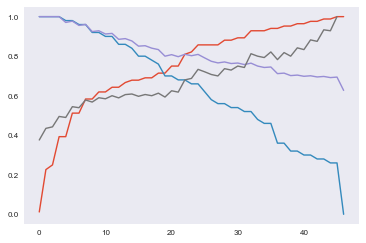

In [16]:
posinum = np.sum(label)
neganum = label.shape[0] - np.sum(label)
fp = a*neganum
tp = b*posinum
tn = (1-a)*neganum
fn = (1-b)*posinum
Sensitivity = tp/(tp+fn) 
Specificity = tn/(tn+fp) 
PPV = tp/(tp+fp) 
NPV = tn/(tn+fn) 
plt.plot(Sensitivity)
plt.plot(Specificity)
plt.plot(PPV)
plt.plot(NPV)

In [17]:
def report_metrics_best(expressionlevel,label):
    posinum = np.sum(label)
    neganum = label.shape[0] - np.sum(label)
    a,b,c= roc_curve(label,expressionlevel) #fpr tpr threshold
    fp = a*neganum
    tp = b*posinum
    tn = (1-a)*neganum
    fn = (1-b)*posinum
    
    Sensitivity = tp/(tp+fn) 
    Specificity = tn/(tn+fp) 
    PPV = tp/(tp+fp) 
    NPV = tn/(tn+fn) 
    
    arith_mean = (Sensitivity+Specificity)*0.5
    geo_mean = (Sensitivity*Specificity)**0.5
    harmo_mean = 2/(1/Sensitivity+1/Specificity)
    eucilid_mean = ((1-Sensitivity)**2+(1-Specificity)**2)**0.5
    mcc_mean = (tp*tn-fp*fn)/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5)
    F1_score = 2*tp/(2*tp+fn+fp)
    auc = sklearn.metrics.auc(a,b)
    acc = (tp+tn)/(tp+tn+fn+fp)
    distoleftup = (a**2+(1-b)**2)**0.5# to the left up
    print ("AUC:" +str(auc))
    return auc,tp,fp,tn,fn,acc,Sensitivity,Specificity,PPV,NPV,arith_mean,geo_mean,harmo_mean,eucilid_mean,mcc_mean,F1_score,distoleftup

In [18]:
auc,tp,fp,tn,fn,acc,Sensitivity,Specificity,PPV,NPV,arith_mean,geo_mean,\
harmo_mean,eucilid_mean,mcc_mean,F1_score,distoleftup = report_metrics_best(expressionlevel,label)

AUC:0.8497619047619047


In [19]:
def metricsplot(styind,contextind,width,height,linewid,metrics,fontsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig, ax = plt.subplots(figsize=(width,height))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    allmetrics = np.array(['tp','fp','tn','fn','acc','Sensitivity','Specificity','PPV','NPV',
                           'arith_mean','geo_mean','harmo_mean','eucilid_mean','mcc_mean','F1_score','distoleftup'])
    for i in range(len(metrics)):
        indtmp = np.where(allmetrics==metrics[i])[0]
        if indtmp.shape[0]:
            ax.plot(report_metrics_best(expressionlevel,label)[1:][indtmp[0]],linewidth=linewid,color=colors[i],
                    label=allmetrics[indtmp[0]] )
    ax.legend(prop={'size': fontsize})#[allmetrics[indtmp[0]]],prop={'size': fontsize})
    #ax.plot(arith_mean,linewidth=linewid,color=color)
    #ax.plot([0,1],[0,1], linewidth=linewid2,alpha=transparency,color=color2)
interact(metricsplot,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=6,max=16,step=1,value=9),
                 height= FloatSlider(min=6,max=16,step=1,value=9),
        linewid= FloatSlider(min=1,max=4,step=0.3,value=1.5),
         fontsize= FloatSlider(min=6,max=20,step=1,value=10),
        metrics=SelectMultiple(options=['tp','fp','tn','fn','acc','Sensitivity','Specificity','PPV','NPV','arith_mean','geo_mean','harmo_mean','eucilid_mean',
                                        'mcc_mean','F1_score','distoleftup'],value=('arith_mean',)))

interactive(children=(FloatSlider(value=1.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=9.0, description=u'width', max=16.0, min=6.0, step=1.0), FloatSlider(value=9.0, description=u'height', max=16.0, min=6.0, step=1.0), FloatSlider(value=1.5, description=u'linewid', max=4.0, min=1.0, step=0.3), SelectMultiple(description=u'metrics', index=(9,), options=('tp', 'fp', 'tn', 'fn', 'acc', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'arith_mean', 'geo_mean', 'harmo_mean', 'eucilid_mean', 'mcc_mean', 'F1_score', 'distoleftup'), value=('arith_mean',)), FloatSlider(value=10.0, description=u'fontsize', max=20.0, min=6.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.metricsplot>

#####  pick原则 用各个指标最高的10个位置，看重复出现次数最多的

In [20]:
uni,counts= np.unique(np.concatenate((np.argsort(-arith_mean)[:10],np.argsort(-geo_mean)[:10],np.argsort(-harmo_mean)[:10],
                np.argsort(-eucilid_mean)[:10],np.argsort(-mcc_mean)[:10],np.argsort(-F1_score)[:10])),return_counts=True)
print (Sensitivity[uni[np.where(counts ==np.max(counts))]])
print (Specificity[uni[np.where(counts ==np.max(counts))]])

[0.85714286]
[0.66]


### plot roc


##### load data

In [21]:
datatable1 = pd.read_excel('Copy of ROC(1).xlsx','cfRNA')
datatable2 = pd.read_excel('Copy of ROC(1).xlsx','exosome')
datatable3 = pd.read_excel('Copy of ROC(1).xlsx','Sheet3')

##### plot fig1

In [22]:
display(datatable1.head(3))
display(datatable2.head(3))

,BCLC,S domain-HCC,S domain-Health,S domain-HBV
0,B,8.60,4.20,1.09
1,C,4.85,2.39,2.14
2,B,9.24,2.41,-5.32


,HD,HCC
0,5.85,9.28
1,6.56,8.73
2,7.38,7.48


for fig 1, create table: <br>
sample expression
plasma_HCC plasma_Normal plasma_HBV+Normal
exosome_HCC,exosome_Normal

In [23]:
plasma_HCC = np.array(datatable1['S domain-HCC'])
plasma_HCC = plasma_HCC[~np.isnan(plasma_HCC)]
plasma_Normal = np.array(datatable1['S domain-Health'])
plasma_Normal = plasma_Normal[~np.isnan(plasma_Normal)]
plasma_HBV_Normal = np.concatenate((np.array(datatable1['S domain-Health']),np.array(datatable1['S domain-HBV'])))
plasma_HBV_Normal = plasma_HBV_Normal[~np.isnan(plasma_HBV_Normal)]
exosome_HCC= np.array(datatable2['HCC'])
exosome_HCC= exosome_HCC[~np.isnan(exosome_HCC)]
exosome_Normal = np.array(datatable2['HD'])
exosome_Normal= exosome_Normal[~np.isnan(exosome_Normal)]

In [24]:
plasma_HCCtab = pd.DataFrame(np.concatenate((np.repeat('plasma_HCC',plasma_HCC.shape[0]).reshape(-1,1),
                                        plasma_HCC.reshape(-1,1)),axis=1))
plasma_Normaltab = pd.DataFrame(np.concatenate((np.repeat('plasma_Normal',plasma_Normal.shape[0]).reshape(-1,1),
                                        plasma_Normal.reshape(-1,1)),axis=1))
plasma_HBV_Normaltab = pd.DataFrame(np.concatenate((np.repeat('plasma_HBV_Normal',plasma_HBV_Normal.shape[0]).reshape(-1,1),
                                        plasma_HBV_Normal.reshape(-1,1)),axis=1))
exosome_HCCtab = pd.DataFrame(np.concatenate((np.repeat('exosome_HCC',exosome_HCC.shape[0]).reshape(-1,1),
                                        exosome_HCC.reshape(-1,1)),axis=1))
exosome_Normaltab = pd.DataFrame(np.concatenate((np.repeat('exosome_Normal',exosome_Normal.shape[0]).reshape(-1,1),
                                        exosome_Normal.reshape(-1,1)),axis=1))

wholetab1 = pd.concat((plasma_HCCtab,plasma_Normaltab,plasma_HBV_Normaltab,exosome_HCCtab,exosome_Normaltab),axis=0)
wholetab1.columns = ['sample','expression']
wholetab1['expression'] = pd.to_numeric(wholetab1['expression'])
wholetab1.head()

,sample,expression
0,plasma_HCC,8.60
1,plasma_HCC,4.85
2,plasma_HCC,9.24
3,plasma_HCC,2.26
4,plasma_HCC,7.76


In [25]:
import scipy.stats as ss
print ('cf hcc vs health p value: '+ str(ss.ranksums(plasma_HCC,plasma_Normal)[1]))
print ('cf hcc vs health_hbv p value: '+ str(ss.ranksums(plasma_HCC,plasma_HBV_Normal)[1]))
print ('exo hcc vs health p value: '+ str(ss.ranksums(exosome_HCC,exosome_Normal)[1]))

fc1 = np.average(plasma_HCC)/np.average(plasma_Normal)
fc2 = np.average(plasma_HCC)/np.average(plasma_HBV_Normal)
fc3 = np.average(exosome_HCC)/np.average(exosome_Normal)
print ('cf hcc vs health fold change: '+ str(fc1))
print ('cf hcc vs health_hbv fold change: '+ str(fc1))
print ('exo hcc vs health fold change: '+ str(fc3))

cf hcc vs health p value: 4.359828647833226e-13
cf hcc vs health_hbv p value: 3.071725323038997e-16
exo hcc vs health p value: 0.05878172135535886
cf hcc vs health fold change: 3.029087686854677
cf hcc vs health_hbv fold change: 3.029087686854677
exo hcc vs health fold change: 3.3760603204524036


In [26]:
str('%0.4s'%fc1)

'3.02'

In [27]:
def box_plot_1(styind,contextind,width,height,showdot,dotsize,fontsize,
               ylim,boxwidth,box_violin,compareheight1,compareheight2,compareheight3):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])


    fig, ax = plt.subplots(figsize=(width,height))
    if box_violin=='violin':
        sns.violinplot(ax=ax,x="sample", y="expression", data=wholetab1, palette="PRGn",width=boxwidth)
    elif box_violin=='box':
        sns.boxplot(ax=ax,x="sample", y="expression", data=wholetab1, palette="PRGn",width=boxwidth)
    if showdot =='yes':
        sns.swarmplot(x="sample", y="expression", data=wholetab1, size=dotsize, edgecolor="black", linewidth=.9)
    ax.set_ylim(ylim)
    # statistical annotation
    x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = wholetab['expression'].max() + compareheight1, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, 'FC ' +str('%0.4s'%fc1)+ '\n ****', ha='center', va='bottom', color=col,size=fontsize)
    x1, x2 = 0, 2
    y, h, col = wholetab['expression'].max() + compareheight2, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, 'FC ' +str('%0.4s'%fc2)+ ' \n ****', ha='center', va='bottom', color=col,size=fontsize)
    x1, x2 = 3, 4 
    y, h, col = wholetab['expression'].max() + compareheight3, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, 'FC ' +str('%0.4s'%fc3)+ ' \n ****', ha='center', va='bottom', color=col,size=fontsize)
interact(box_plot_1,styind=FloatSlider(min=0,max=3,step=1,value=2),
               contextind=FloatSlider(min=0,max=3,step=1,value=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         boxwidth= FloatSlider(min=0.05,max=0.5,step=0.05,value=0.2),
         dotsize= FloatSlider(min=1,max=8,step=1),
         fontsize= FloatSlider(min=8,max=30,step=2),
         ylim=FloatRangeSlider(value=[-10, 25],min=-20,max=30.0,step=3),
            showdot=RadioButtons(options=['yes','no']),
        box_violin = Dropdown(options=['box','violin'],value='violin'),
         compareheight1=FloatSlider(min=3,max=10,step=1,value=3),
         compareheight2=FloatSlider(min=3,max=10,step=1,value=6),
         compareheight3=FloatSlider(min=3,max=10,step=1,value=6))

interactive(children=(FloatSlider(value=2.0, description=u'styind', max=3.0, step=1.0), FloatSlider(value=1.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), RadioButtons(description=u'showdot', options=('yes', 'no'), value='yes'), FloatSlider(value=1.0, description=u'dotsize', max=8.0, min=1.0, step=1.0), FloatSlider(value=8.0, description=u'fontsize', max=30.0, min=8.0, step=2.0), FloatRangeSlider(value=(-10.0, 25.0), description=u'ylim', max=30.0, min=-20.0, step=3.0), FloatSlider(value=0.2, description=u'boxwidth', max=0.5, min=0.05, step=0.05), Dropdown(description=u'box_violin', index=1, options=('box', 'violin'), value='violin'), FloatSlider(value=3.0, description=u'compareheight1', max=10.0, min=3.0, step=1.0), FloatSlider(value=6.0, description=u'compareheight2', max=10.0, min=3.0, step=1.0), FloatSlider(value=6.0, description=u'compareheight3', max=10.0, min=3.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot_1>

In [28]:
def rocplot1(styind,contextind,width,height,linewid,color,linewid2,color2,transparency,fontsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig, ax = plt.subplots(figsize=(width,height))
    
    a,b,_ = roc_curve(np.concatenate((np.ones([exosome_HCC.shape[0]]),np.zeros([exosome_Normal.shape[0]]))),np.concatenate((exosome_HCC,exosome_Normal)),drop_intermediate=False)   
    ax.plot(a,b,linewidth=linewid,color=color[0],label='exosome')
    a,b,_ = roc_curve(np.concatenate((np.ones([plasma_HCC.shape[0]]),np.zeros([plasma_Normal.shape[0]]))),np.concatenate((plasma_HCC,plasma_Normal)))   
    ax.plot(a,b,linewidth=linewid,color=color[1],label='plasma -HBV')
    a,b,_ = roc_curve(np.concatenate((np.ones([plasma_HCC.shape[0]]),np.zeros([plasma_HBV_Normal.shape[0]]))),np.concatenate((plasma_HCC,plasma_HBV_Normal)))   
    ax.plot(a,b,linewidth=linewid,color=color[2],label='plasma +HBV')
    ax.legend(prop={'size': fontsize})
    #ax.plot(b,a,linewidth=linewid,color=color,linestyle='dashed') #solid’ | ‘dashed’, ‘dashdot’, ‘dotted
    ax.plot([0,1],[0,1], linewidth=linewid2,alpha=transparency,color=color2,linestyle='--')
interact(rocplot1,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1,value=1),
                width =FloatSlider(min=6,max=16,step=1,value=8),
                 height= FloatSlider(min=6,max=16,step=1,value=8),
        linewid= FloatSlider(min=1,max=4,step=0.3,value=1.5),
        color=SelectMultiple(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'],value=('b', 'g', 'r')),
        linewid2= FloatSlider(min=1,max=4,step=0.3,value=1.5),
         fontsize= FloatSlider(min=6,max=20,step=1,value=10),
        transparency=FloatSlider(min=0,max=1,step=0.05,value=0.5),
        color2=Dropdown(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))

interactive(children=(FloatSlider(value=1.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=1.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=8.0, description=u'width', max=16.0, min=6.0, step=1.0), FloatSlider(value=8.0, description=u'height', max=16.0, min=6.0, step=1.0), FloatSlider(value=1.5, description=u'linewid', max=4.0, min=1.0, step=0.3), SelectMultiple(description=u'color', index=(0, 1, 2), options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value=('b', 'g', 'r')), FloatSlider(value=1.5, description=u'linewid2', max=4.0, min=1.0, step=0.3), Dropdown(description=u'color2', options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value='b'), FloatSlider(value=0.5, description=u'transparency', max=1.0, step=0.05), FloatSlider(value=10.0, description=u'fontsize', max=20.0, min=6.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.rocplot1>

In [29]:
def find_metrics_best(label,expressionlevel):
    posinum = np.sum(label)
    neganum = label.shape[0] - np.sum(label)
    a,b,c= roc_curve(label,expressionlevel) #fpr tpr threshold
    fp = a*neganum
    tp = b*posinum
    tn = (1-a)*neganum
    fn = (1-b)*posinum
    
    Sensitivity = tp/(tp+fn) 
    Specificity = tn/(tn+fp) 
    PPV = tp/(tp+fp) 
    NPV = tn/(tn+fn) 
    
    arith_mean = (Sensitivity+Specificity)*0.5
    geo_mean = (Sensitivity*Specificity)**0.5
    harmo_mean = 2/(1/Sensitivity+1/Specificity)
    eucilid_mean = ((1-Sensitivity)**2+(1-Specificity)**2)**0.5
    mcc_mean = (tp*tn-fp*fn)/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5)
    F1_score = 2*tp/(2*tp+fn+fp)
    auc = sklearn.metrics.auc(a,b)
    acc = (tp+tn)/(tp+tn+fn+fp)
    distoleftup = (a**2+(1-b)**2)**0.5# to the left up
    #print ("AUC:" +str(auc))
    
    thres = int(label.shape[0]/10.) if int(label.shape[0]/10.)>0 else 1
    uni,counts= np.unique(np.concatenate((np.argsort(-arith_mean)[:thres],np.argsort(-geo_mean)[:thres],np.argsort(-harmo_mean)[:thres],
                np.argsort(-eucilid_mean)[:thres],np.argsort(-mcc_mean)[:thres],np.argsort(-F1_score)[:thres])),return_counts=True)
    #print (Sensitivity[uni[np.where(counts ==np.max(counts))][0]])
    #print (Specificity[uni[np.where(counts ==np.max(counts))][0]])
    #print (F1_score)
    #print (np.argsort(-F1_score))
    return auc,Sensitivity[uni[np.where(counts ==np.max(counts))][0]],Specificity[uni[np.where(counts ==np.max(counts))][0]]

In [30]:
pd.DataFrame(np.concatenate((np.array(find_metrics_best(np.concatenate((np.ones([exosome_HCC.shape[0]]),np.zeros([exosome_Normal.shape[0]]))),np.concatenate((exosome_HCC,exosome_Normal)))).reshape(1,-1),
                np.array(find_metrics_best(np.concatenate((np.ones([plasma_HCC.shape[0]]),np.zeros([plasma_Normal.shape[0]]))),np.concatenate((plasma_HCC,plasma_Normal)))).reshape(1,-1),
                np.array(find_metrics_best(np.concatenate((np.ones([plasma_HCC.shape[0]]),np.zeros([plasma_HBV_Normal.shape[0]]))),np.concatenate((plasma_HCC,plasma_HBV_Normal)))).reshape(1,-1)
               )),columns=['AUC','Specificity','Sensitivity'],
             index=['exosome','plasma -HBV','plasma +HBV'])


,AUC,Specificity,Sensitivity
exosome,0.750000,1.00,0.50
plasma -HBV,0.863400,0.87,0.66
plasma +HBV,0.868643,0.70,0.90


In [ ]:
def metricsplot(styind,contextind,width,height,linewid,metrics,fontsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig, ax = plt.subplots(figsize=(width,height))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    allmetrics = np.array(['tp','fp','tn','fn','acc','Sensitivity','Specificity','PPV','NPV',
                           'arith_mean','geo_mean','harmo_mean','eucilid_mean','mcc_mean','F1_score','distoleftup'])
    for i in range(len(metrics)):
        indtmp = np.where(allmetrics==metrics[i])[0]
        if indtmp.shape[0]:
            ax.plot(report_metrics_best(np.concatenate((exosome_HCC,exosome_Normal)),np.concatenate((np.ones([exosome_HCC.shape[0]]),np.zeros([exosome_Normal.shape[0]]))))[1:][indtmp[0]],linewidth=linewid,color=colors[i],
                    label=allmetrics[indtmp[0]] )
    ax.legend(prop={'size': fontsize})#[allmetrics[indtmp[0]]],prop={'size': fontsize})
    #ax.plot(arith_mean,linewidth=linewid,color=color)
    #ax.plot([0,1],[0,1], linewidth=linewid2,alpha=transparency,color=color2)
interact(metricsplot,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=6,max=16,step=1,value=9),
                 height= FloatSlider(min=6,max=16,step=1,value=9),
        linewid= FloatSlider(min=1,max=4,step=0.3,value=1.5),
         fontsize= FloatSlider(min=6,max=20,step=1,value=10),
        metrics=SelectMultiple(options=['tp','fp','tn','fn','acc','Sensitivity','Specificity','PPV','NPV','arith_mean','geo_mean','harmo_mean','eucilid_mean',
                                        'mcc_mean','F1_score','distoleftup'],value=('arith_mean',)))

##### plot fig2

In [31]:
datatable1.head()

,BCLC,S domain-HCC,S domain-Health,S domain-HBV
0,B,8.60,4.20,1.09
1,C,4.85,2.39,2.14
2,B,9.24,2.41,-5.32
3,B,2.26,6.01,4.00
4,B,7.76,2.44,5.51


In [32]:
def load_data(table):
    datatable = table
    return np.array(datatable.loc[datatable['BCLC'] =="A",["S domain-HCC"]]).ravel().astype('float'),np.array(datatable.loc[datatable['BCLC'] =="B",["S domain-HCC"]]).ravel().astype('float'),np.array(datatable.loc[datatable['BCLC'] =="C",["S domain-HCC"]]).ravel().astype('float'),np.array(datatable['S domain-Health']).ravel().astype('float')

stageA,stageB,stageC,health = load_data(datatable1)
health= datatable1['S domain-Health']
health = health[~np.isnan(health)]
hcc = np.concatenate((stageA,stageB,stageC))

In [33]:
stageAtab = pd.DataFrame(np.concatenate((np.repeat('hcc',stageA.shape[0]).reshape(-1,1),
                                         np.repeat('stageA',stageA.shape[0]).reshape(-1,1),stageA.reshape(-1,1)),axis=1))
stageBtab = pd.DataFrame(np.concatenate((np.repeat('hcc',stageB.shape[0]).reshape(-1,1),
                                         np.repeat('stageB',stageB.shape[0]).reshape(-1,1),stageB.reshape(-1,1)),axis=1))
stageCtab = pd.DataFrame(np.concatenate((np.repeat('hcc',stageC.shape[0]).reshape(-1,1),
                                         np.repeat('stageC',stageC.shape[0]).reshape(-1,1),stageC.reshape(-1,1)),axis=1))
healthtab = pd.DataFrame(np.concatenate((np.repeat('health',health.shape[0]*2).reshape(-1,2),health.reshape(-1,1)),axis=1))
wholetab = pd.concat((stageAtab,stageBtab,stageCtab,healthtab),axis=0)
wholetab.columns = ['sample','stage','expression']
wholetab.head()
wholetab['expression'] = pd.to_numeric(wholetab['expression'])
wholetab.head()

import scipy.stats as ss
values_per_group = [col for col_name, col in wholetab.groupby('sample')['expression']]
print ('hcc vs health p value: '+ str(ss.ranksums(*values_per_group)[1]))
print ('stageA vs health p value: '+ str(ss.ranksums(wholetab[wholetab['stage']=="stageA"]['expression'],wholetab[wholetab['stage']=="health"]['expression'])[1]))
print ('stageB vs health p value: '+ str(ss.ranksums(wholetab[wholetab['stage']=="stageB"]['expression'],wholetab[wholetab['stage']=="health"]['expression'])[1]))
print ('stageC vs health p value: '+ str(ss.ranksums(wholetab[wholetab['stage']=="stageB"]['expression'],wholetab[wholetab['stage']=="health"]['expression'])[1]))


fc1 = np.average(wholetab[wholetab['sample']=="hcc"]['expression'])/np.average(wholetab[wholetab['sample']=="health"]['expression'])
fc2 = np.average(wholetab[wholetab['stage']=="stageA"]['expression'])/np.average(wholetab[wholetab['stage']=="health"]['expression'])
fc3 = np.average(wholetab[wholetab['stage']=="stageB"]['expression'])/np.average(wholetab[wholetab['stage']=="health"]['expression'])
fc4 = np.average(wholetab[wholetab['stage']=="stageC"]['expression'])/np.average(wholetab[wholetab['stage']=="health"]['expression'])
print ('hcc vs health fold change: '+ str(fc1))
print ('stageA vs health fold change: '+ str(fc1))
print ('stageB vs health fold change: '+ str(fc3))
print ('stageC vs health fold change: '+ str(fc4))


hcc vs health p value: 1.3986894714551318e-11
stageA vs health p value: 8.59708134367873e-06
stageB vs health p value: 2.605179305102531e-10
stageC vs health p value: 2.605179305102531e-10
hcc vs health fold change: 3.0088923379492036
stageA vs health fold change: 3.0088923379492036
stageB vs health fold change: 3.5900498279139055
stageC vs health fold change: 3.3826475574048387


In [34]:
def box_plot_stage(styind,contextind,width,height,showdot,
                   dotsize,fontsize,ylim,compareheight1,compareheight2,compareheight3,boxwidth,box_violin):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])


    fig, ax = plt.subplots(figsize=(width,height))
    if box_violin=='violin':
        sns.violinplot(ax=ax,x="sample", y="expression", data=wholetab1, palette="PRGn",width=boxwidth)
    elif box_violin=='box':
        sns.boxplot(ax=ax,x="stage", y="expression", data=wholetab, palette="PRGn",width=boxwidth)
    if showdot =='yes':
        sns.swarmplot(x="stage", y="expression", data=wholetab, size=dotsize, edgecolor="black", linewidth=.9)
    ax.set_ylim(ylim)
    # statistical annotation
    x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = wholetab['expression'].max() + compareheight1, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.1, y+h, "FC 3.00 \n ****", ha='center', va='bottom', color=col,size=fontsize)
    x1, x2 = 1, 3 
    y, h, col = wholetab['expression'].max() + compareheight2, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.35, y+h, "FC 3.59 \n ****", ha='center', va='bottom', color=col,size=fontsize)
    x1, x2 = 2, 3 
    y, h, col = wholetab['expression'].max() + compareheight3, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, "FC 3.38 \n ****", ha='center', va='bottom', color=col,size=fontsize)
interact(box_plot_stage,styind=FloatSlider(min=0,max=3,step=1,value=2),
               contextind=FloatSlider(min=0,max=3,step=1,value=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         dotsize= FloatSlider(min=1,max=8,step=1),
         fontsize= FloatSlider(min=8,max=30,step=2),
         ylim=FloatRangeSlider(value=[-10, 22],min=-20,max=30.0,step=3),
            showdot=RadioButtons(options=['yes','no']),
        compareheight1=FloatSlider(min=1,max=10,step=1,value=1),
         compareheight2=FloatSlider(min=1,max=10,step=1,value=2),
         compareheight3=FloatSlider(min=1,max=10,step=1,value=3),
        boxwidth= FloatSlider(min=0.05,max=0.5,step=0.05,value=0.2),
        box_violin = Dropdown(options=['box','violin'],value='box'))

interactive(children=(FloatSlider(value=2.0, description=u'styind', max=3.0, step=1.0), FloatSlider(value=1.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), RadioButtons(description=u'showdot', options=('yes', 'no'), value='yes'), FloatSlider(value=1.0, description=u'dotsize', max=8.0, min=1.0, step=1.0), FloatSlider(value=8.0, description=u'fontsize', max=30.0, min=8.0, step=2.0), FloatRangeSlider(value=(-10.0, 22.0), description=u'ylim', max=30.0, min=-20.0, step=3.0), FloatSlider(value=1.0, description=u'compareheight1', max=10.0, min=1.0, step=1.0), FloatSlider(value=2.0, description=u'compareheight2', max=10.0, min=1.0, step=1.0), FloatSlider(value=3.0, description=u'compareheight3', max=10.0, min=1.0, step=1.0), FloatSlider(value=0.2, description=u'boxwidth', max=0.5, min=0.05, step=0.05), Dropdown(description=u'box_violin', options=('box', 'violin'), value='box'), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot_stage>

In [35]:
def rocplot_stage(styind,contextind,width,height,linewid,color,linewid2,color2,transparency,fontsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig, ax = plt.subplots(figsize=(width,height))
    
    a,b,_ = roc_curve(np.concatenate((np.ones([stageA.shape[0]]),np.zeros([health.shape[0]]))),np.concatenate((stageA,health)))   
    ax.plot(a,b,linewidth=linewid,color=color[0],label='Stage A')
    a,b,_ = roc_curve(np.concatenate((np.ones([stageB.shape[0]]),np.zeros([health.shape[0]]))),np.concatenate((stageB,health)))   
    ax.plot(a,b,linewidth=linewid,color=color[1],label='Stage B')
    a,b,_ = roc_curve(np.concatenate((np.ones([stageC.shape[0]]),np.zeros([health.shape[0]]))),np.concatenate((stageC,health)))   
    ax.plot(a,b,linewidth=linewid,color=color[2],label='Stage C')
    ax.legend(prop={'size': fontsize})
    #ax.plot(b,a,linewidth=linewid,color=color,linestyle='dashed') #solid’ | ‘dashed’, ‘dashdot’, ‘dotted
    ax.plot([0,1],[0,1], linewidth=linewid2,alpha=transparency,color=color2,linestyle='--')
interact(rocplot_stage,styind=FloatSlider(min=0,max=3,step=1,value=2),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=6,max=16,step=1,value=8),
                 height= FloatSlider(min=6,max=16,step=1,value=8),
        linewid= FloatSlider(min=1,max=4,step=0.3,value=1.5),
        color=SelectMultiple(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'],value=('b', 'g', 'r')),
        linewid2= FloatSlider(min=1,max=4,step=0.3,value=1.5),
         fontsize= FloatSlider(min=6,max=20,step=1,value=10),
        transparency=FloatSlider(min=0,max=1,step=0.05,value=0.5),
        color2=Dropdown(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))

interactive(children=(FloatSlider(value=2.0, description=u'styind', max=3.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=8.0, description=u'width', max=16.0, min=6.0, step=1.0), FloatSlider(value=8.0, description=u'height', max=16.0, min=6.0, step=1.0), FloatSlider(value=1.5, description=u'linewid', max=4.0, min=1.0, step=0.3), SelectMultiple(description=u'color', index=(0, 1, 2), options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value=('b', 'g', 'r')), FloatSlider(value=1.5, description=u'linewid2', max=4.0, min=1.0, step=0.3), Dropdown(description=u'color2', options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value='b'), FloatSlider(value=0.5, description=u'transparency', max=1.0, step=0.05), FloatSlider(value=10.0, description=u'fontsize', max=20.0, min=6.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.rocplot_stage>

In [36]:
pd.DataFrame(np.concatenate((np.array(find_metrics_best(np.concatenate((np.ones([stageA.shape[0]]),np.zeros([health.shape[0]]))),np.concatenate((stageA,health)))).reshape(1,-1),
                np.array(find_metrics_best(np.concatenate((np.ones([stageB.shape[0]]),np.zeros([health.shape[0]]))),np.concatenate((stageB,health)))).reshape(1,-1),
                np.array(find_metrics_best(np.concatenate((np.ones([stageC.shape[0]]),np.zeros([health.shape[0]]))),np.concatenate((stageC,health)))).reshape(1,-1)
               )),columns=['AUC','Specificity','Sensitivity'],
             index=['stageA','stageB','stageC'])


,AUC,Specificity,Sensitivity
stageA,0.774000,0.775000,0.66
stageB,0.924000,0.766667,0.98
stageC,0.907143,0.714286,0.96


##### plot fig3

In [37]:
datatable3.head()

,S-Health,S-HBV,S-HCC,L-Health,L-HBV,L-HCC
0,10.95,9.62,12.23,5.73,6.41,7.18
1,9.26,11.67,12.38,3.20,3.73,7.52
2,8.98,8.79,11.23,3.47,1.73,5.99
3,11.86,8.61,8.98,6.65,2.43,3.66
4,12.07,9.89,-0.03,6.34,3.05,-4.55


In [38]:
plasma_HCC = np.array(datatable1['S domain-HCC'])
plasma_HCC = plasma_HCC[~np.isnan(plasma_HCC)]
plasma_Normal = np.array(datatable1['S domain-Health'])
plasma_Normal = plasma_Normal[~np.isnan(plasma_Normal)]
plasma_HBV_Normal = np.concatenate((np.array(datatable1['S domain-Health']),np.array(datatable1['S domain-HBV'])))
plasma_HBV_Normal = plasma_HBV_Normal[~np.isnan(plasma_HBV_Normal)]
exosome_HCC= np.array(datatable2['HCC'])
exosome_HCC= exosome_HCC[~np.isnan(exosome_HCC)]
exosome_Normal = np.array(datatable2['HD'])
exosome_Normal= exosome_Normal[~np.isnan(exosome_Normal)]

plasma_HCCtab = pd.DataFrame(np.concatenate((np.repeat('plasma_HCC',plasma_HCC.shape[0]).reshape(-1,1),
                                        plasma_HCC.reshape(-1,1)),axis=1))
plasma_Normaltab = pd.DataFrame(np.concatenate((np.repeat('plasma_Normal',plasma_Normal.shape[0]).reshape(-1,1),
                                        plasma_Normal.reshape(-1,1)),axis=1))
plasma_HBV_Normaltab = pd.DataFrame(np.concatenate((np.repeat('plasma_HBV_Normal',plasma_HBV_Normal.shape[0]).reshape(-1,1),
                                        plasma_HBV_Normal.reshape(-1,1)),axis=1))
exosome_HCCtab = pd.DataFrame(np.concatenate((np.repeat('exosome_HCC',exosome_HCC.shape[0]).reshape(-1,1),
                                        exosome_HCC.reshape(-1,1)),axis=1))
exosome_Normaltab = pd.DataFrame(np.concatenate((np.repeat('exosome_Normal',exosome_Normal.shape[0]).reshape(-1,1),
                                        exosome_Normal.reshape(-1,1)),axis=1))

wholetab1 = pd.concat((plasma_HCCtab,plasma_Normaltab,plasma_HBV_Normaltab,exosome_HCCtab,exosome_Normaltab),axis=0)
wholetab1.columns = ['sample','expression']
wholetab1['expression'] = pd.to_numeric(wholetab1['expression'])
wholetab1.head()


import scipy.stats as ss
print ('cf hcc vs health p value: '+ str(ss.ranksums(plasma_HCC,plasma_Normal)[1]))
print ('cf hcc vs health_hbv p value: '+ str(ss.ranksums(plasma_HCC,plasma_HBV_Normal)[1]))
print ('exo hcc vs health p value: '+ str(ss.ranksums(exosome_HCC,exosome_Normal)[1]))

fc1 = np.average(plasma_HCC)/np.average(plasma_Normal)
fc2 = np.average(plasma_HCC)/np.average(plasma_HBV_Normal)
fc3 = np.average(exosome_HCC)/np.average(exosome_Normal)
print ('cf hcc vs health fold change: '+ str(fc1))
print ('cf hcc vs health_hbv fold change: '+ str(fc1))
print ('exo hcc vs health fold change: '+ str(fc3))



cf hcc vs health p value: 4.359828647833226e-13
cf hcc vs health_hbv p value: 3.071725323038997e-16
exo hcc vs health p value: 0.05878172135535886
cf hcc vs health fold change: 3.029087686854677
cf hcc vs health_hbv fold change: 3.029087686854677
exo hcc vs health fold change: 3.3760603204524036


In [39]:
def box_plot_1(styind,contextind,width,height,showdot,dotsize,fontsize,
               ylim,boxwidth,box_violin,compareheight1,compareheight2,compareheight3):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])


    fig, ax = plt.subplots(figsize=(width,height))
    if box_violin=='violin':
        sns.violinplot(ax=ax,x="sample", y="expression", data=wholetab1, palette="PRGn",width=boxwidth)
    elif box_violin=='box':
        sns.boxplot(ax=ax,x="sample", y="expression", data=wholetab1, palette="PRGn",width=boxwidth)
    if showdot =='yes':
        sns.swarmplot(x="sample", y="expression", data=wholetab1, size=dotsize, edgecolor="black", linewidth=.9)
    ax.set_ylim(ylim)
    # statistical annotation
    x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = wholetab['expression'].max() + compareheight1, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, 'FC ' +str('%0.4s'%fc1)+ '\n ****', ha='center', va='bottom', color=col,size=fontsize)
    x1, x2 = 0, 2
    y, h, col = wholetab['expression'].max() + compareheight2, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, 'FC ' +str('%0.4s'%fc2)+ ' \n ****', ha='center', va='bottom', color=col,size=fontsize)
    x1, x2 = 3, 4 
    y, h, col = wholetab['expression'].max() + compareheight3, 0.5, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
    plt.text((x1+x2)*.5, y+h, 'FC ' +str('%0.4s'%fc3)+ ' \n ****', ha='center', va='bottom', color=col,size=fontsize)
interact(box_plot_1,styind=FloatSlider(min=0,max=3,step=1,value=2),
               contextind=FloatSlider(min=0,max=3,step=1,value=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         boxwidth= FloatSlider(min=0.05,max=0.5,step=0.05,value=0.2),
         dotsize= FloatSlider(min=1,max=8,step=1),
         fontsize= FloatSlider(min=8,max=30,step=2),
         ylim=FloatRangeSlider(value=[-10, 25],min=-20,max=30.0,step=3),
            showdot=RadioButtons(options=['yes','no']),
        box_violin = Dropdown(options=['box','violin'],value='violin'),
         compareheight1=FloatSlider(min=3,max=10,step=1,value=3),
         compareheight2=FloatSlider(min=3,max=10,step=1,value=6),
         compareheight3=FloatSlider(min=3,max=10,step=1,value=6))

def rocplot1(styind,contextind,width,height,linewid,color,linewid2,color2,transparency,fontsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig, ax = plt.subplots(figsize=(width,height))
    
    a,b,_ = roc_curve(np.concatenate((np.ones([exosome_HCC.shape[0]]),np.zeros([exosome_Normal.shape[0]]))),np.concatenate((exosome_HCC,exosome_Normal)),drop_intermediate=False)   
    ax.plot(a,b,linewidth=linewid,color=color[0],label='exosome')
    a,b,_ = roc_curve(np.concatenate((np.ones([plasma_HCC.shape[0]]),np.zeros([plasma_Normal.shape[0]]))),np.concatenate((plasma_HCC,plasma_Normal)))   
    ax.plot(a,b,linewidth=linewid,color=color[1],label='plasma -HBV')
    a,b,_ = roc_curve(np.concatenate((np.ones([plasma_HCC.shape[0]]),np.zeros([plasma_HBV_Normal.shape[0]]))),np.concatenate((plasma_HCC,plasma_HBV_Normal)))   
    ax.plot(a,b,linewidth=linewid,color=color[2],label='plasma +HBV')
    ax.legend(prop={'size': fontsize})
    #ax.plot(b,a,linewidth=linewid,color=color,linestyle='dashed') #solid’ | ‘dashed’, ‘dashdot’, ‘dotted
    ax.plot([0,1],[0,1], linewidth=linewid2,alpha=transparency,color=color2,linestyle='--')
interact(rocplot1,styind=FloatSlider(min=0,max=2,step=1,value=1),
               contextind=FloatSlider(min=0,max=3,step=1,value=1),
                width =FloatSlider(min=6,max=16,step=1,value=8),
                 height= FloatSlider(min=6,max=16,step=1,value=8),
        linewid= FloatSlider(min=1,max=4,step=0.3,value=1.5),
        color=SelectMultiple(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'],value=('b', 'g', 'r')),
        linewid2= FloatSlider(min=1,max=4,step=0.3,value=1.5),
         fontsize= FloatSlider(min=6,max=20,step=1,value=10),
        transparency=FloatSlider(min=0,max=1,step=0.05,value=0.5),
        color2=Dropdown(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))

interactive(children=(FloatSlider(value=2.0, description=u'styind', max=3.0, step=1.0), FloatSlider(value=1.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), RadioButtons(description=u'showdot', options=('yes', 'no'), value='yes'), FloatSlider(value=1.0, description=u'dotsize', max=8.0, min=1.0, step=1.0), FloatSlider(value=8.0, description=u'fontsize', max=30.0, min=8.0, step=2.0), FloatRangeSlider(value=(-10.0, 25.0), description=u'ylim', max=30.0, min=-20.0, step=3.0), FloatSlider(value=0.2, description=u'boxwidth', max=0.5, min=0.05, step=0.05), Dropdown(description=u'box_violin', index=1, options=('box', 'violin'), value='violin'), FloatSlider(value=3.0, description=u'compareheight1', max=10.0, min=3.0, step=1.0), FloatSlider(value=6.0, description=u'compareheight2', max=10.0, min=3.0, step=1.0), FloatSlider(value=6.0, description=u'compareheight3', max=10.0, min=3.0, step=1.0), Output()), _dom_classes=('widget-interact',))

interactive(children=(FloatSlider(value=1.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=1.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=8.0, description=u'width', max=16.0, min=6.0, step=1.0), FloatSlider(value=8.0, description=u'height', max=16.0, min=6.0, step=1.0), FloatSlider(value=1.5, description=u'linewid', max=4.0, min=1.0, step=0.3), SelectMultiple(description=u'color', index=(0, 1, 2), options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value=('b', 'g', 'r')), FloatSlider(value=1.5, description=u'linewid2', max=4.0, min=1.0, step=0.3), Dropdown(description=u'color2', options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value='b'), FloatSlider(value=0.5, description=u'transparency', max=1.0, step=0.05), FloatSlider(value=10.0, description=u'fontsize', max=20.0, min=6.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.rocplot1>